# <center> Face Feature Extraction <center>

The face recognition system consists of a feature extraction step and a classification step. 
Principal component analysis (PCA) is widely used in such scenarios to construct the feature 
space and extract features, substantially reducing the dimensionality of the input feature 
vector/image. The reduced feature vector can then be used for the purpose of face analysis.

## AIM:
Using PCA create a face recognition system that gives access to only certain people. To 
implement this, you can use LFW_peoples dataset provided in the scikit-learn library.
Given this dataset, use only those classes that have a minimum (use
min_faces_per_person = 70, resize = 0.4 ) 70 images (should give you only 
11 classes). Given this subset of images, apply PA to obtain the corresponding eigen face 
for each class. You can additionally train a classifier for recognition purpose


### Steps
- Import libraries
- Load LFW dataset
- Checking the size,shape,target name
- Extracting Data and labels
- Reshaping the images
- Perform PCA and plot the variance ratio
- Showing Eigen faces
- Transform data using PCA
- Train SVM classifier 
- Checking the score
- Display the confusion Matrix
- Display original image and predicted image




### Import libraries

In [57]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
lfw_people=fetch_lfw_people(min_faces_per_person=70,resize=0.4)# to have a managable size

It is a bunch object with the attribute 
like images,data,target and target name.
- Images--> matrix with height X width and each pixel represents the value in the grayscale image.

- Data--> Same info as in Images but in an array format. It is a flattened 1D array represented in the images.

- Target--> is another array which contain intergers corresponding to the labels of each images.Eg: 0--> one person; 1-->represents another person and so on.

- Target_name--> Actual label which is the array containing the array of the people in the dataset.



### Checking size and shape

In [8]:
images=lfw_people.images
images.shape

(1288, 50, 37)

In [9]:
images[2]

array([[0.34379086, 0.39477125, 0.49150327, ..., 0.5803922 , 0.58954257,
        0.58300656],
       [0.38169935, 0.5071896 , 0.57124186, ..., 0.6261439 , 0.5908497 ,
        0.5751634 ],
       [0.48366013, 0.5686275 , 0.579085  , ..., 0.64183015, 0.59738564,
        0.5751634 ],
       ...,
       [0.29673204, 0.2875817 , 0.28496733, ..., 0.46013072, 0.6732027 ,
        0.70326805],
       [0.28627452, 0.26666668, 0.27058825, ..., 0.5908497 , 0.7267974 ,
        0.7098039 ],
       [0.3150327 , 0.25490198, 0.26013073, ..., 0.709804  , 0.72156864,
        0.7163399 ]], dtype=float32)

In [10]:
images.size

2382800

### Checking Target Name and size

In [11]:
target_name=lfw_people.target_names
target_name

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [13]:
target_name.size

7

There are 1288 observations with 7 values(people) in it.

### Extracting Data and Labels

In [14]:
# As it is already flatterened we are directly adding to X; Y-> integer value of the target name
x=lfw_people.data
y=lfw_people.target

Text(0.5, 1.0, 'Hugo Chavez')

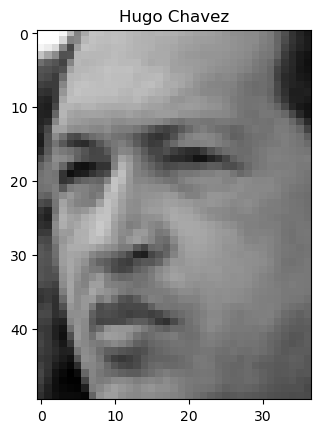

In [15]:
# Plotting the images
plt.imshow(images[0],cmap='gray')
plt.title(target_name[lfw_people.target[0]])

In [17]:
# Ploting some images from dataset
#Randomly picking an image using Index

rand_ind=np.random.choice(x.shape[0],10)
rand_ind


array([1169,  911, 1207,  884,   46,  674,  660,  104,  350, 1105])

### Randomly Ploting Original Images 

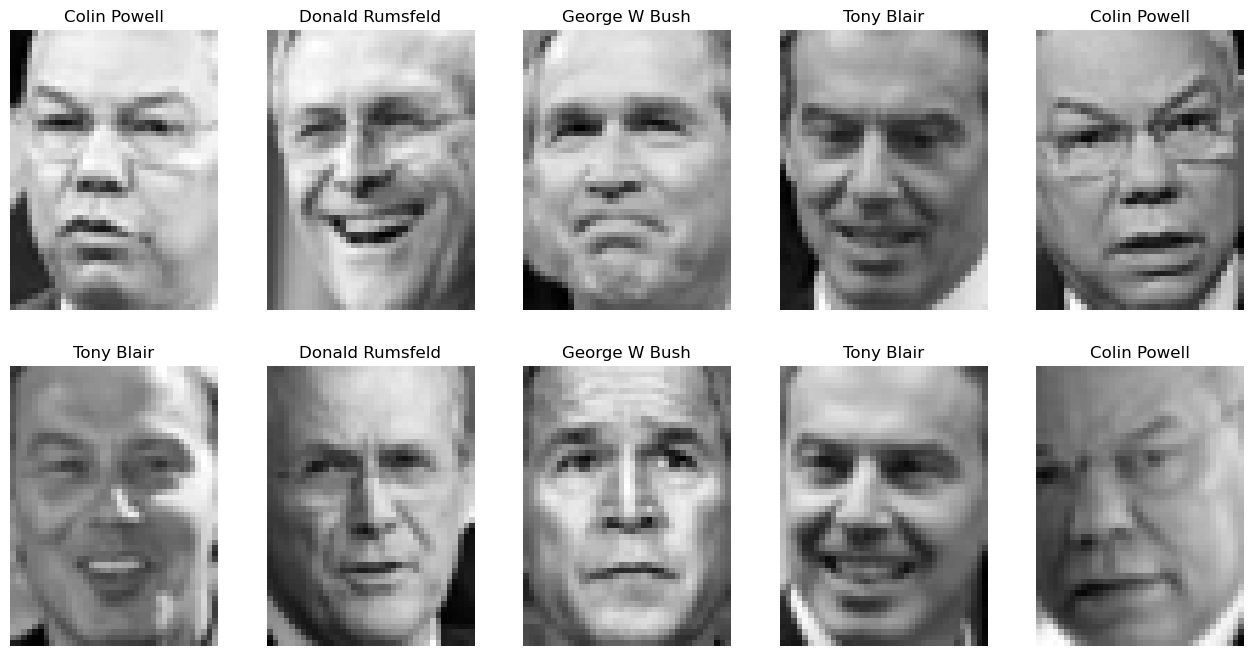

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
x = lfw_people.data
y = lfw_people.target

# Generate random indices to select random images from the dataset
np.random.seed(42)  # For reproducibility
num_images_to_display = 10  # Change this number to display more or fewer images
rand_ind = np.random.randint(0, len(x), size=num_images_to_display)

fig, ax = plt.subplots(2, 5, figsize=(16, 8))

for i in range(2):
    for j in range(5):
        img = x[rand_ind[i * 5 + j]].reshape(50, 37)
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].set_title(lfw_people.target_names[y[rand_ind[i * 5 + j]]])
        ax[i, j].axis('off')

plt.show()
#''''''Let's break down the code x[rand_ind[i * 5 + j]] step by step:

#rand_ind: This is an array containing random indices generated using np.random.randint(). These indices are used to select random images from the dataset x.

#i * 5 + j: In the loop, i iterates from 0 to 1, and j iterates from 0 to 4. The expression i * 5 + j calculates the corresponding linear index for the 2x5 grid. For example, when i = 0 and j = 0, the calculated index is 0. When i = 0 and j = 1, the calculated index is 1, and so on. This linear index is used to access the elements of the rand_ind array.

#rand_ind[i * 5 + j]: This expression uses the calculated linear index to access an element from the rand_ind array. As mentioned earlier, rand_ind contains random indices. So, rand_ind[i * 5 + j] gives you a specific random index from the array.

#x[rand_ind[i * 5 + j]]: Finally, this code uses the selected random index to access the corresponding image data from the x array. The x array contains the flattened pixel data of face images, and x[rand_ind[i * 5 + j]] retrieves the specific image data corresponding to the randomly selected index.

#To summarize, x[rand_ind[i * 5 + j]] selects a random image's flattened pixel data from the x array based on the calculated linear index in the 2x5 grid. This allows you to plot different random face images from the LFW dataset in the 2x5 grid.


### Splitting the images for Training and Testing

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1984)

In [61]:
from sklearn.decomposition import PCA

### Perform PCA

In [62]:
#To reduce the dimension of the data
num_samples, height, width = x_train.shape
x_train_2d = x_train.reshape(num_samples, height * width)


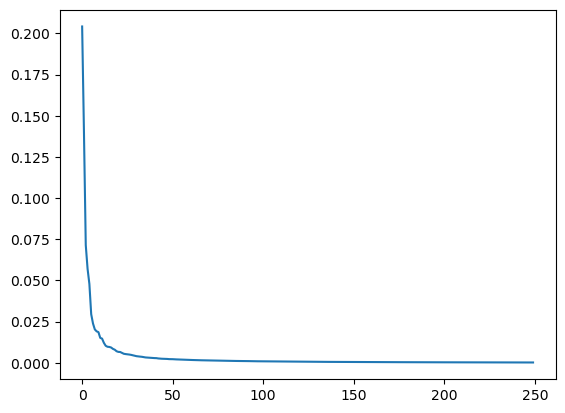

In [63]:
# PCA is going to happen on training dataset such that the number of features will be reduced to 150 PCA. The results will be in pca object

pca=PCA(n_components=250).fit(x_train_2d)
plt.plot(pca.explained_variance_ratio_)
plt.show()

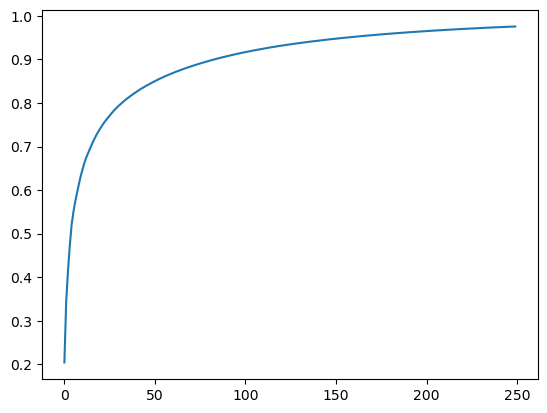

In [64]:
pca=PCA(n_components=250).fit(x_train_2d)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

### Show Eigen Faces

In [69]:
def show_eigenfaces(pca, original_images):
    # Displaying Eigenfaces and Original Images
    fig, axes = plt.subplots(3, 8, figsize=(12, 6),
                             subplot_kw={'xticks': [], 'yticks': []})
    eigenfaces = pca.components_.reshape(-1, 50, 37)  # Reshape eigenfaces to match image size
    for i, ax in enumerate(axes.flat):
        if i < len(eigenfaces):
            ax.imshow(eigenfaces[i], cmap='gray')
            ax.set_title("Eigenface " + str(i + 1))
        else:
            ax.imshow(original_images[i - len(eigenfaces)], cmap='gray')
            ax.set_title("Original Image " + str(i - len(eigenfaces) + 1))
    plt.show()


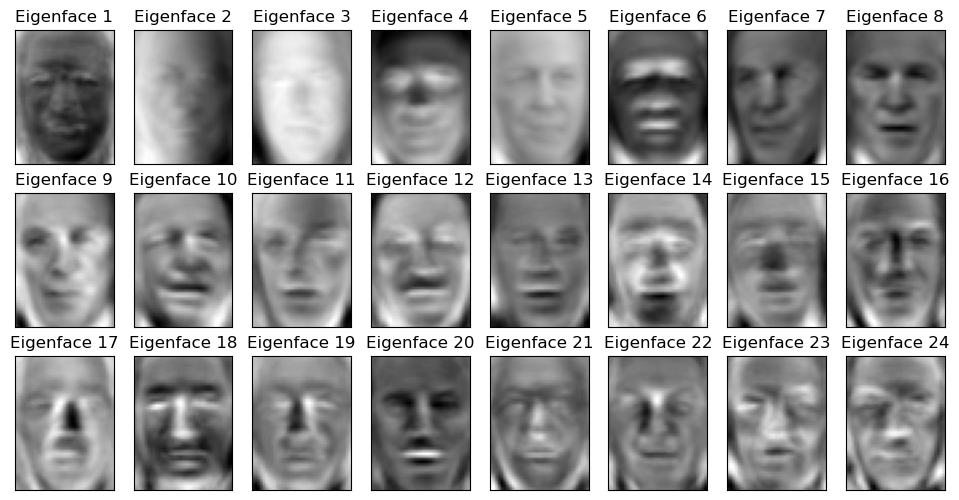

In [70]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
original_images = lfw_people.images
# Perform PCA and obtain `pca` object

show_eigenfaces(pca, original_images)

### Transforming Data to Pca

In [71]:
num_samples_test, height_test, width_test = x_test.shape
x_test_2d = x_test.reshape(num_samples_test, height_test * width_test)


In [72]:
# Now transform x_train and x_test dataset such that each observations is projected on this 150 components
x_train_pca=pca.transform(x_train_2d)
x_test_pca=pca.transform(x_test_2d)


### Train SVM classifier 

In [73]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
clf=SVC(kernel='rbf',class_weight='balanced')
clf.fit(x_train_pca,y_train)

SVC(class_weight='balanced')

### Checking the score

In [75]:
# Scoring the pca transformed data
clf.score(x_test_pca,y_test)

0.7608695652173914

### Confusion matrix

In [77]:
from sklearn import metrics
y_pred_pca=clf.predict(x_test_pca)

In [78]:

cm=confusion_matrix(y_test,y_pred_pca,labels=range(len(target_name)))
cm

array([[ 10,   1,   2,   2,   0,   2,   0],
       [  2,  46,   1,  11,   1,   1,   1],
       [  1,   2,  17,   5,   0,   0,   0],
       [  0,   7,   5, 111,   3,   2,   4],
       [  1,   1,   2,   1,  16,   1,   1],
       [  0,   1,   0,   2,   2,  13,   0],
       [  0,   4,   0,   5,   3,   0,  32]])

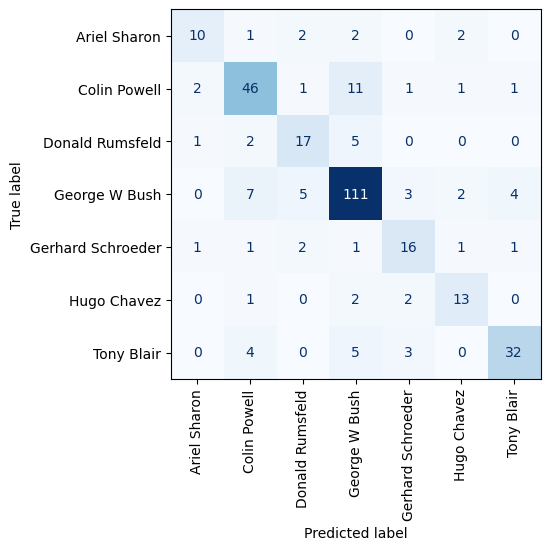

In [79]:
# We use this instead of the heat map because we need to display the labels as names and not numbers(int)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = target_name)
display.plot(cmap='Blues',colorbar=False,xticks_rotation='vertical')

In [80]:
print(classification_report(y_test,y_pred_pca,target_names=target_name))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.59      0.65        17
     Colin Powell       0.74      0.73      0.74        63
  Donald Rumsfeld       0.63      0.68      0.65        25
    George W Bush       0.81      0.84      0.83       132
Gerhard Schroeder       0.64      0.70      0.67        23
      Hugo Chavez       0.68      0.72      0.70        18
       Tony Blair       0.84      0.73      0.78        44

         accuracy                           0.76       322
        macro avg       0.72      0.71      0.72       322
     weighted avg       0.76      0.76      0.76       322



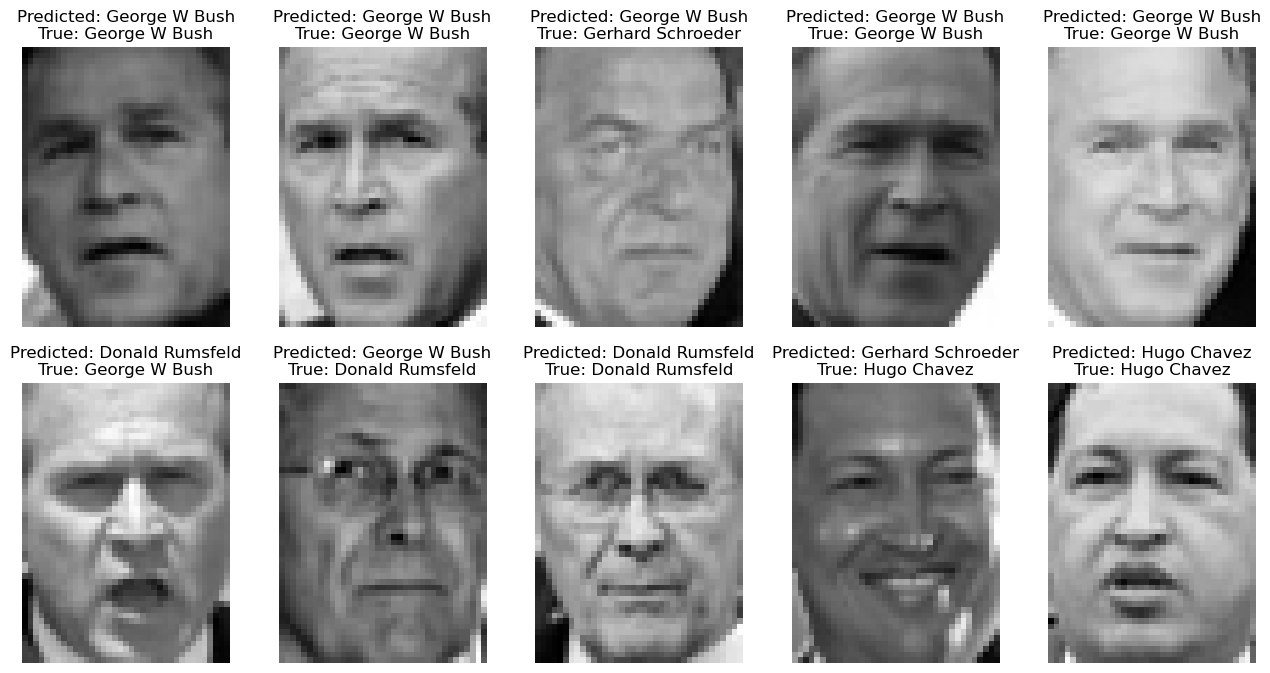

In [81]:
# Display original and predicted images
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

for i in range(2):
    for j in range(5):
        img_index = i * 5 + j
        img = x_test[img_index].reshape(height, width)
        pred_label = y_pred_pca[img_index]
        pred_name = target_name[pred_label]
        true_label = y_test[img_index]
        true_name = target_name[true_label]
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].set_title(f'Predicted: {pred_name}\nTrue: {true_name}')
        axes[i, j].axis('off')

plt.show()





